<a href="https://colab.research.google.com/github/Rafiqahh/APM_KLP10/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('OnlineRetail.csv', delimiter=',', encoding = "ISO-8859-1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(111308, 8)

In [5]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
111303,545716,20685,DOORMAT RED RETROSPOT,2,07-03-2011 10:15,16.63,NaN,United Kingdom
111304,545716,20711,JUMBO BAG TOYS,2,07-03-2011 10:15,4.13,NaN,United Kingdom
111305,545716,20712,JUMBO BAG WOODLAND ANIMALS,6,07-03-2011 10:15,4.13,NaN,United Kingdom
111306,545716,20713,JUMBO BAG OWLS,2,07-03-2011 10:15,4.13,NaN,United Kingdom
111307,545716,21035,SET/2 RED RETROSPOT TEA TOWELS,7,07-03-,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111308 entries, 0 to 111307
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    111308 non-null  object 
 1   StockCode    111308 non-null  object 
 2   Description  110983 non-null  object 
 3   Quantity     111308 non-null  int64  
 4   InvoiceDate  111308 non-null  object 
 5   UnitPrice    111307 non-null  float64
 6   CustomerID   73930 non-null   float64
 7   Country      111307 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
data.isnull().sum()

InvoiceNo          0
StockCode          0
Description      325
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     37378
Country            1
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.shape

(73930, 8)

In [10]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
#change the format of InvoiceDate
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73930 entries, 0 to 111054
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    73930 non-null  object        
 1   StockCode    73930 non-null  object        
 2   Description  73930 non-null  object        
 3   Quantity     73930 non-null  int64         
 4   InvoiceDate  73930 non-null  datetime64[ns]
 5   UnitPrice    73930 non-null  float64       
 6   CustomerID   73930 non-null  float64       
 7   Country      73930 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.1+ MB


In [14]:
# delet the hour and creat the new column Date instead of InvoiceDate
data['Date']=data['InvoiceDate'].dt.date
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12


In [15]:
data['Date']

0         2010-01-12
1         2010-01-12
2         2010-01-12
3         2010-01-12
4         2010-01-12
             ...    
111050    2011-07-03
111051    2011-07-03
111052    2011-07-03
111053    2011-07-03
111054    2011-07-03
Name: Date, Length: 73930, dtype: object

(array([733773., 733863., 733954., 734046., 734138., 734228., 734319.,
        734411., 734503.]), <a list of 9 Text major ticklabel objects>)

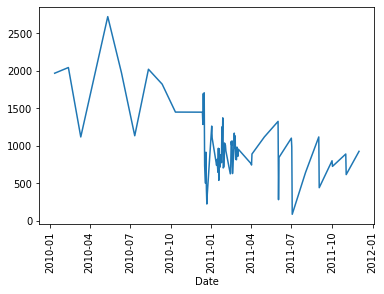

In [16]:
#daily demand
daily_demand = data.groupby(by = ['Date'])['InvoiceNo'].count()
daily_demand.plot()
plt.xticks(rotation = 90) 

In [17]:
data['Amount'] = data['UnitPrice'] * data['Quantity'] 
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,20.34


In [18]:
data1=pd.DataFrame({'monetary': data.groupby(by = ['CustomerID'])['Amount'].sum()})
data1.head()

,monetary
CustomerID,
12346.0,0.00
12347.0,1187.18
12348.0,1120.24
12350.0,334.40
12352.0,440.85


Text(0, 0.5, 'Frequency')

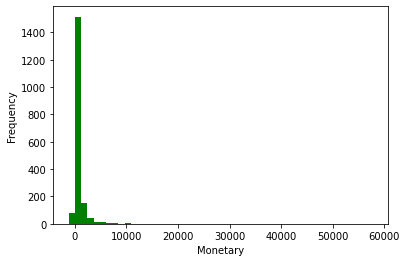

In [19]:
#Histogram of monetary
plt.hist(data1['monetary'], color = 'green', 
         bins = np.linspace(data1['monetary'].min(), data1['monetary'].max(), 50))
plt.xlabel('Monetary')
plt.ylabel('Frequency')

In [20]:
data1.describe()

,monetary
count,1838.000000
mean,853.443906
std,2507.709929
min,-1192.200000
25%,187.500000
50%,365.560000
75%,774.717500
max,57821.020000


In [21]:
data2 = pd.DataFrame({'freq': data.groupby(by = ['CustomerID'])['InvoiceNo'].count()})
data2.head()

,freq
CustomerID,
12346.0,2
12347.0,60
12348.0,23
12350.0,17
12352.0,26


Text(0, 0.5, 'Frequency')

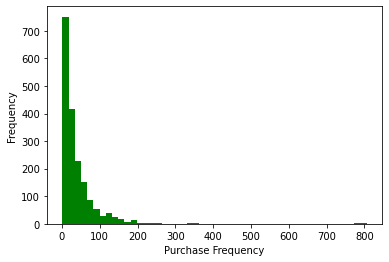

In [22]:
#Histogram of  frequency
plt.hist(data2['freq'], color = 'green', 
         bins = np.linspace(data2['freq'].min(), data2['freq'].max(), 50))
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')

In [23]:
data['Date'].max()

datetime.date(2011, 12, 1)

In [24]:
Last_transact = pd.to_datetime(data['Date'].max()).date() - data['Date']
Last_transact

0        688 days
1        688 days
2        688 days
3        688 days
4        688 days
           ...   
111050   151 days
111051   151 days
111052   151 days
111053   151 days
111054   151 days
Name: Date, Length: 73930, dtype: timedelta64[ns]

In [25]:
Last_transact.dt.days

0         688
1         688
2         688
3         688
4         688
         ... 
111050    151
111051    151
111052    151
111053    151
111054    151
Name: Date, Length: 73930, dtype: int64

In [26]:
data['Last_transact'] = Last_transact.dt.days
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Amount,Last_transact
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,15.30,688
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,20.34,688
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,22.00,688
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,20.34,688
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,20.34,688


In [27]:
data3 = pd.DataFrame({'recency': data.groupby(by = ['CustomerID'])['Last_transact'].min()})
data3

,recency
CustomerID,
12346.0,317
12347.0,309
12348.0,310
12350.0,302
12352.0,288
...,...
18260.0,91
18269.0,350
18277.0,310


Text(0, 0.5, 'Frequency')

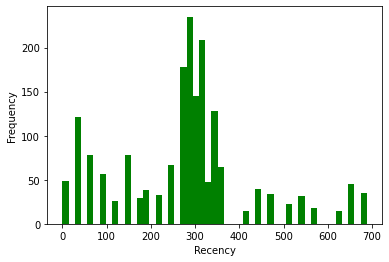

In [28]:
#Histogram of recency
plt.hist(data3['recency'], color = 'green', 
         bins = np.linspace(data3['recency'].min(), data3['recency'].max(), 50))
plt.xlabel('Recency')
plt.ylabel('Frequency')

In [29]:
df = data1.merge(data2, left_index = True, right_index = True)
df

,monetary,freq
CustomerID,,
12346.0,0.00,2
12347.0,1187.18,60
12348.0,1120.24,23
12350.0,334.40,17
12352.0,440.85,26
...,...,...
18260.0,769.52,40
18269.0,138.90,8
18277.0,-12.75,1


In [30]:
rfm_customer = df.merge(data3, left_index = True, right_index = True)
rfm_customer

,monetary,freq,recency
CustomerID,,,
12346.0,0.00,2,317
12347.0,1187.18,60,309
12348.0,1120.24,23,310
12350.0,334.40,17,302
12352.0,440.85,26,288
...,...,...,...
18260.0,769.52,40,91
18269.0,138.90,8,350
18277.0,-12.75,1,310


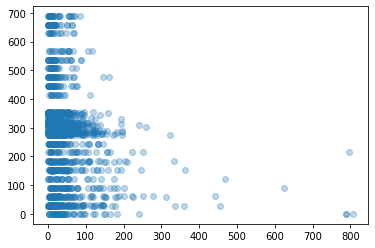

In [31]:
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['recency'], alpha = 0.3)

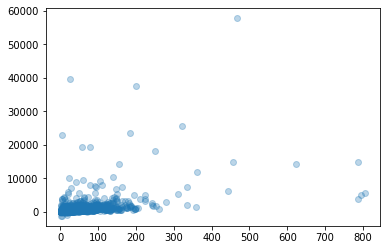

In [32]:
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['monetary'], alpha = 0.3)

In [33]:
rfm_customer[['freq', 'monetary']].corr(method = 'pearson')

,freq,monetary
freq,1.000000,0.445956
monetary,0.445956,1.000000


In [34]:
#Scale features
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(rfm_customer)
scaled_data

array([[-0.34042062, -0.63546807,  0.24239433],
       [ 0.13312023,  0.32879643,  0.19000631],
       [ 0.10641929, -0.28633782,  0.19655481],
       ...,
       [-0.34550632, -0.65209332,  0.19655481],
       [-0.26838312, -0.50246607, -0.84465697],
       [-0.21361707,  1.52581442, -0.63510491]])

In [35]:
scaled_data = pd.DataFrame(scaled_data, 
                           columns = rfm_customer.columns, 
                           index = rfm_customer.index)

scaled_data

,monetary,freq,recency
CustomerID,,,
12346.0,-0.340421,-0.635468,0.242394
12347.0,0.133120,0.328796,0.190006
12348.0,0.106419,-0.286338,0.196555
12350.0,-0.207036,-0.386089,0.144167
12352.0,-0.164575,-0.236462,0.052488
...,...,...,...
18260.0,-0.033475,-0.003709,-1.237567
18269.0,-0.285016,-0.535717,0.458495
18277.0,-0.345506,-0.652093,0.196555


In [36]:
from sklearn.cluster import KMeans
seg_km1 = KMeans(n_clusters = 7, init = 'k-means++', random_state = 1000, n_init = 15).fit(scaled_data)
rfm_customer['seg_km1'] = seg_km1.predict(scaled_data)
rfm_customer

,monetary,freq,recency,seg_km1
CustomerID,,,,
12346.0,0.00,2,317,0
12347.0,1187.18,60,309,0
12348.0,1120.24,23,310,0
12350.0,334.40,17,302,0
12352.0,440.85,26,288,0
...,...,...,...,...
18260.0,769.52,40,91,1
18269.0,138.90,8,350,0
18277.0,-12.75,1,310,0


In [37]:
#Results
rfm_customer.groupby(['seg_km1'])[['freq', 'recency', 'monetary']].mean()

,freq,recency,monetary
seg_km1,,,
0,26.155620,303.604227,478.333468
1,30.506667,84.410667,760.995013
2,231.000000,111.333333,45087.050000
3,21.382353,563.600840,250.061933
4,707.500000,61.000000,8328.033333
5,140.757576,188.284848,2180.639818
6,201.000000,100.200000,18076.197000


Text(0, 0.5, 'recency')

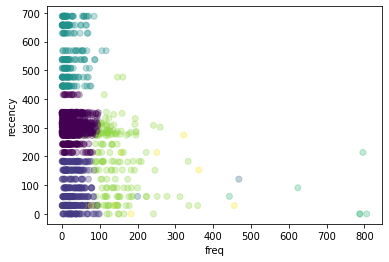

In [38]:
#Scatter Plot 
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['recency'], 
            c = rfm_customer['seg_km1'], alpha = 0.3)
plt.xlabel('freq')
plt.ylabel('recency')

In [39]:
rfm_customer['seg_km1'].value_counts()

0    1041
1     375
3     238
5     165
6      10
4       6
2       3
Name: seg_km1, dtype: int64

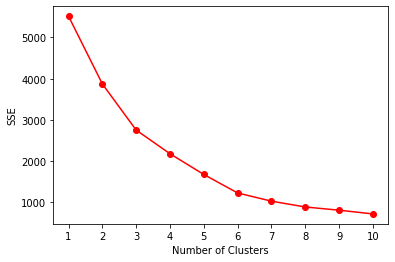

In [40]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1234, n_init = 10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, 'ro-')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()